# 1. Introduction to pySIMDEUM
This section demonstrates the core functionality of pySIMDEUM by creating, and simulating, an example `House`.

The core object in pySIMDEUM is the `House`. Users and appliances are sampled and belong to a `House`.

## `House` data structure

When creating a `House` object the user needs to input the `house_type` (`one_person`, `two_person`, `family`). From that, users and appliances are sampled to populate a house. By default, a consumption profile is simulated when the `House` object is created. Discharge profiles are optional and by default are not simulated.

Main schema:
* id
* house_type
* statistics
* user
* appliances
* `consumption`
* `discharge` (_optional_)


In [3]:
import pysimdeum
import matplotlib.pyplot as plt

To initialise a `House`, you need to input the type of house to generate.

In [ ]:
# Build a house (one-person household)
house = pysimdeum.built_house(house_type='one_person')
print(house)

House:
	id	=	c8bfb71a-eb7e-4348-8a0e-cfb5d7d3c228
	type	=	one_person
	user	=	1
	appliances	=	['WcNew', 'BathroomTap', 'KitchenTap', 'OutsideTap', 'NormalShower', 'WashingMachine']


/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:286: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

In [ ]:
# Show the type of house
print("House type:")
print(house.house_type)

House type:
one_person


You can view the statistics used to inform the sampling process. In this case, we are specifically accessing the population statistics for a `one_person` household.
* `division_gender` provides probability of sampling `male` or `female` users.
* `division_age` is the probability of that user being in an age category.
* `job` is the probability the sampled user works out of the house.

In [30]:
house.statistics.__dict__['household']['one_person']

{'people': 1,
 'households': 34,
 'division_gender': {'male': 46, 'female': 54},
 'division_age': {'child': 0, 'teen': 0, 'adult': 70, 'senior': 30},
 'job': {'male': 67.5, 'female': 52.4}}

You can see the details of the `user` that is sampled to populate this `House`. 

In [6]:
# Show the inhabitants of a house
print("List of Users:")
print(house.users)

List of Users:
[User(id='user_1', gender='male', age='home_ad', job=False)]


Appliances (or enduses) are sampled to populate a `House` based on input statistcs. Statistics data for a `Wc` is shown below. `penetration` is at 100% meaning all houses must have a `Wc`. The subtypes of `WcNormal`, `WcNormalSave`, `WcNew` and `WcNewSave` are shown to have varying penetrations. This is to represent a range of different appliance subtypes that a population of households might contain.

In [37]:
house.statistics.__dict__['end_uses']['Wc']

{'classname': 'Wc',
 'penetration': 100,
 'offset': 0,
 'temperature': 10,
 'prob_flush_interuption': 70,
 'intensity': 0.042,
 'discharge_intensity': 1.2,
 'frequency': {'distribution': 'Poisson',
  'average': {'child': {'male': 3.8, 'female': 5.4, 'total': 4.6},
   'teen': {'male': 4.1, 'female': 5.1, 'total': 4.7},
   'work_ad': {'male': 5.3, 'female': 6.8, 'total': 6.0},
   'home_ad': {'male': 7.0, 'female': 7.0, 'total': 7.0},
   'senior': {'male': 7.4, 'female': 6.8, 'total': 7.2},
   'total': {'male': 5.3, 'female': 6.4, 'total': 5.9}}},
 'subtype': {'WcNormal': {'penetration': 33.3,
   'flush_interuption': False,
   'cistern_size': 9,
   'duration': '3.6 Minutes'},
  'WcNormalSave': {'penetration': 22.2,
   'flush_interuption': True,
   'cistern_size': 9,
   'duration': '3.6 Minutes'},
  'WcNew': {'penetration': 11.1,
   'flush_interuption': False,
   'cistern_size': 6,
   'duration': '2.4 Minutes'},
  'WcNewSave': {'penetration': 33.3,
   'flush_interuption': True,
   'cistern

A list of the sampled appliances are shown. Note the specific `Wc` subtype that is sampled.

In [7]:
# Show water end-use devices present in the house
print("List of Devices:")
print(house.appliances) 

List of Devices:
[WcNew(name='WcNew'), BathroomTap(name='BathroomTap'), KitchenTap(name='KitchenTap'), OutsideTap(name='OutsideTap'), NormalShower(name='NormalShower'), WashingMachine(name='EndUse')]


You can access the simulated `consumption` profiles and produce various plots. We can plot `totalflow` for the `House` as well as a hourly rolling average.

In [38]:
# Build statistics from consumption
tot_cons = house.consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns'])
print(tot_cons)

<xarray.DataArray (time: 86401)> Size: 691kB
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time       (time) datetime64[ns] 691kB 2025-03-26 ... 2025-03-27
    flowtypes  <U9 36B 'totalflow'


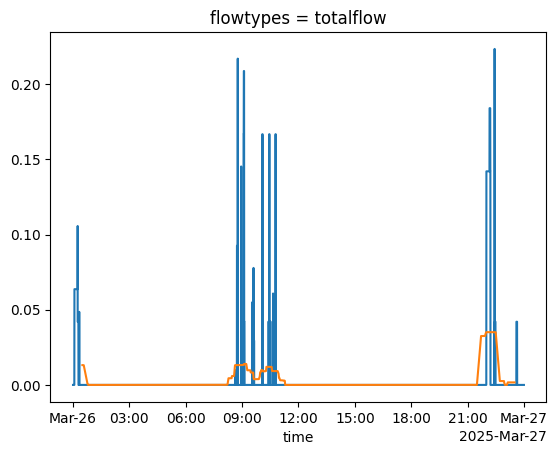

In [39]:
# Plot total consumption
tot_cons.plot()
tot_cons.rolling(time=3600, center=True).mean().plot()
plt.show()

Or for a more granular look you can plot a consumption profile for a specific appliance in the `House`.

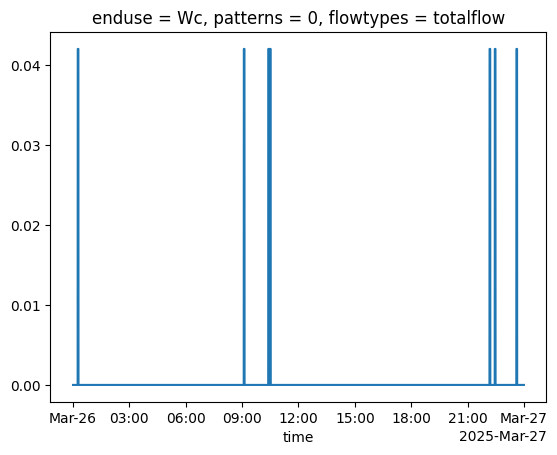

In [40]:
# Plot consumption for a specific end-use
house.consumption.sum(["user"]).sel(enduse="Wc").sel(flowtypes="totalflow").plot()